# Визуализация массивов numpy

## Изображения как массивы
В компьютерной графике используется так называемое "растровое" представление изображения, которое представляет собой не что иное как матрицу "пикселей", каждый элемент которой является числовым кодом цвета. Массив numpy, имеющий подходящие размеры и подходящий тип данных, может быть визуализирован непосредственно как растровое изображение. Посмотрим простой пример.

In [68]:
import numpy as np
gradient = np.tile(np.arange(0, 255, dtype='uint8'), (255, 1))
#np.arange(0, 256, dtype='uint8')
print(gradient)

[[  0   1   2 ... 252 253 254]
 [  0   1   2 ... 252 253 254]
 [  0   1   2 ... 252 253 254]
 ...
 [  0   1   2 ... 252 253 254]
 [  0   1   2 ... 252 253 254]
 [  0   1   2 ... 252 253 254]]


Стоит обратить внимание на тип данных - uint8. Это целое беззнаковое 8-битное число. Проще говоря, просто 1 байт. Именно такой тип используется для кодирования цвета (хотя библиотека matplotlib позволяет визуализировать массивы с любыми типами данных, но для некоторых других целей стоит использовать тип uint8). О функции `np.tile` почитайте подробнее в документации.

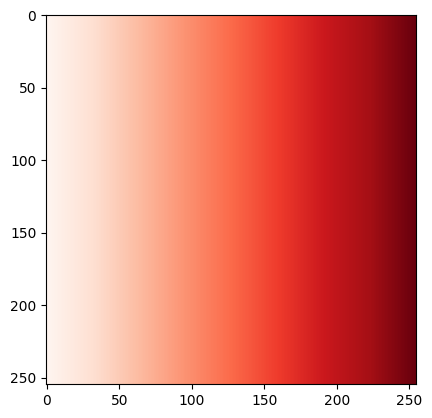

In [69]:
import matplotlib.pyplot as plt
plt.imshow(gradient, cmap='Reds', vmin=0, vmax=255)
plt.show()

Визуализация массива в matplotlib выполняется с помощью функции imshow. Аргументы `cmap='gray', vmin=0, vmax=255` говорят о том, что должны использоваться оттенки серого со значениями от 0 (черный) до 255 (белый).

**Упраженение №1**

Попробуйте поэкспериментировать с этими параметрами. Посмотреть встроенные цветовые схемы matplotlib можно здесь: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [71]:
cmaps={}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

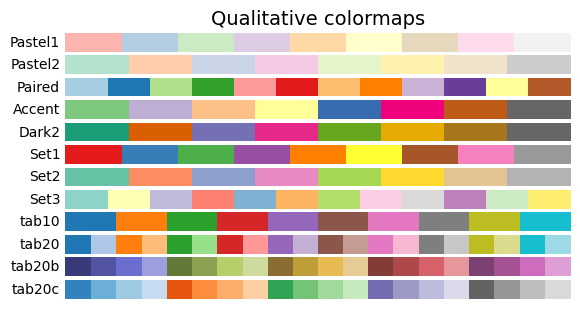

In [72]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

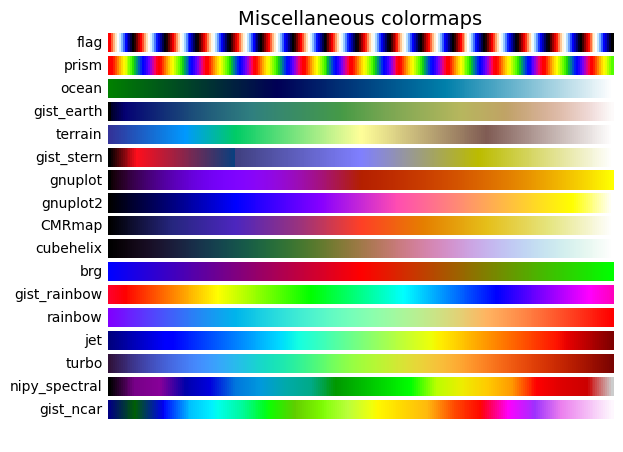

In [73]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()

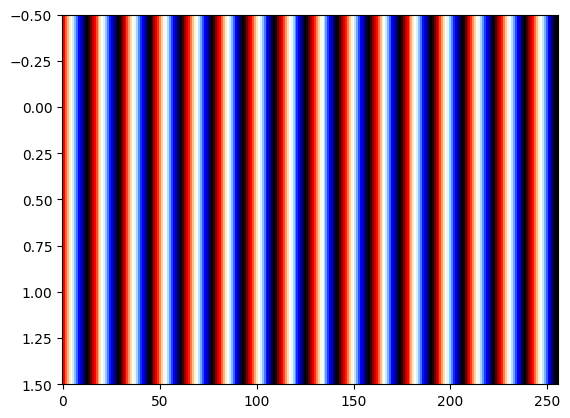

In [74]:
plt.imshow(gradient, aspect='auto', cmap=mpl.colormaps['flag'])
plt.show()
#print(gradient)

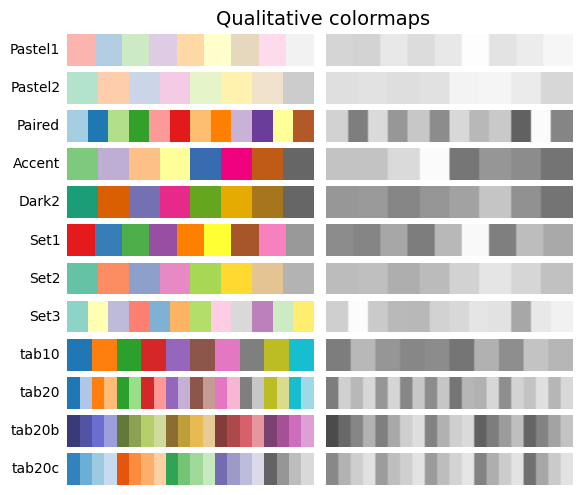

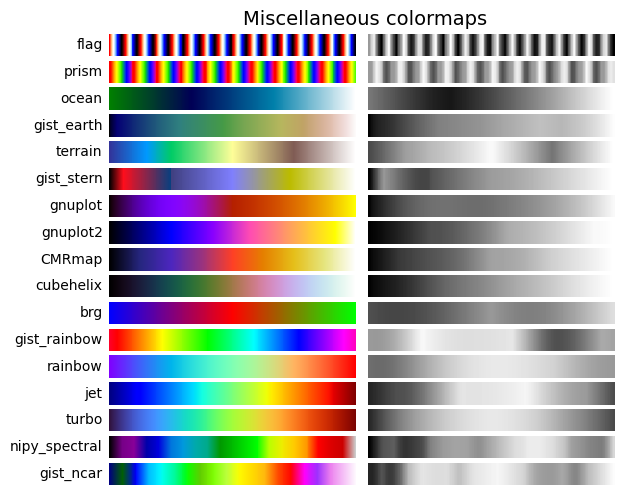

In [75]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

## Загрузка растрового изображения в массив
Воспользовавшись библиотекой pillow можно загрузить в массив растровое изображение.

In [3]:
from PIL import Image
img = Image.open('flowers.jpg')
img_arr = np.array(img)
print(img_arr)

[[[ 91 146  62]
  [ 90 145  61]
  [ 90 145  61]
  ...
  [ 98 116  56]
  [102 120  60]
  [104 124  63]]

 [[ 90 145  61]
  [ 90 145  61]
  [ 89 144  60]
  ...
  [104 119  60]
  [106 124  64]
  [108 126  68]]

 [[ 89 144  61]
  [ 89 144  61]
  [ 88 143  60]
  ...
  [109 122  66]
  [112 125  69]
  [114 127  73]]

 ...

 [[ 49  91  43]
  [ 49  91  41]
  [ 50  92  44]
  ...
  [ 23  48  19]
  [ 23  48  19]
  [ 22  48  19]]

 [[ 49  91  41]
  [ 50  93  40]
  [ 51  93  43]
  ...
  [ 22  48  19]
  [ 22  48  19]
  [ 22  48  19]]

 [[ 50  93  40]
  [ 51  94  41]
  [ 52  95  42]
  ...
  [ 22  48  19]
  [ 22  48  19]
  [ 22  48  19]]]


In [77]:
img_arr.shape

(1182, 1773, 3)

Мы получили 3-мерный массив. Первые две оси - это высота и ширина изображения, третья ось содержит три компонента цвета - красный, синий и зеленый. Отобразить изображение можно тем же способом.

In [78]:
plt.imshow(img_arr)
plt.show()

Поскольку в данном случае мы имеем цветное изображение, параметр `cmap` указывать не нужно.

## Обработка изображений

Попробуем применить к изображению (или, что то же самое, к массиву) некоторые из известных нам операций. Например, усреднение по третьей оси (т.е. по оси цвета) дает нам черно-белое изображение.

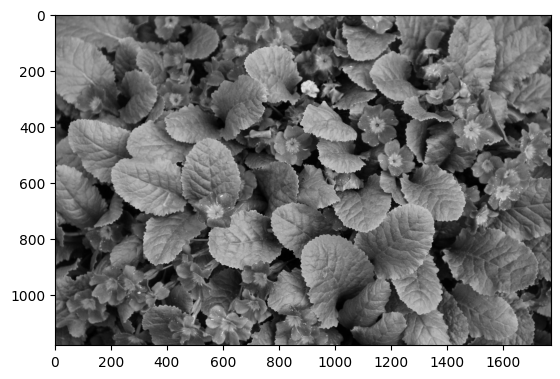

In [4]:
plt.imshow(img_arr.mean(axis=2), cmap='gray')
plt.show()

Можно визуализировать отдельно красный, зеленый и синий компоненты изображения.

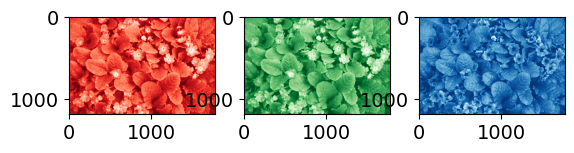

In [ ]:
ax1 = plt.subplot(131)
ax1.imshow(img_arr[:, :, 0], cmap='Reds_r')
ax2 = plt.subplot(132)
ax2.imshow(img_arr[:, :, 0], cmap='Greens_r')
ax3 = plt.subplot(133)
ax3.imshow(img_arr[:, :, 2], cmap='Blues_r')
plt.show()

С помощью срезов и транспонирования можно переворачивать изображение (при транспонировании нужно правильно указать оси, чтобы цвет остался без изменений).

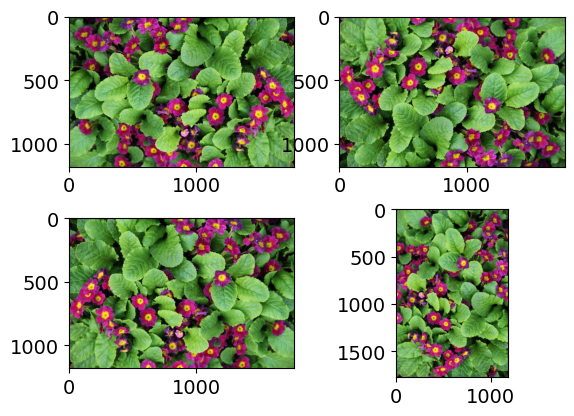

In [ ]:
ax1 = plt.subplot(221)
ax1.imshow(img_arr[::-1])
ax2 = plt.subplot(222)
ax2.imshow(img_arr[:, ::-1])
ax3 = plt.subplot(223)
ax3.imshow(img_arr[::-1, ::-1,:])
ax3 = plt.subplot(224)
ax3.imshow(np.transpose(img_arr, (1, 0, 2)))
plt.show()

С помощью некоторых математических функций можно производить обработку изображения. Например, увеличить красный компонент (преобразования типов необходимы, чтобы не выйти за пределы допустимых значений байта и не получить некрасивые искажения).

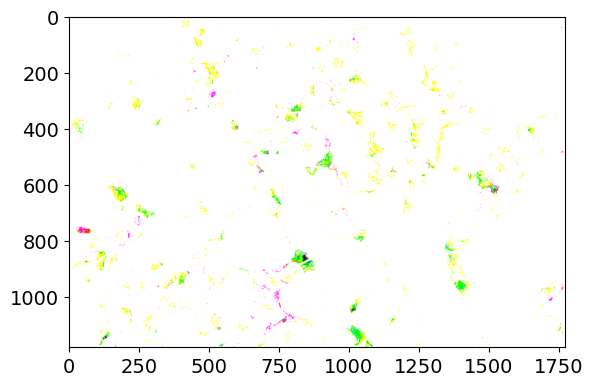

In [ ]:
modified = img_arr.astype('float')
modified[:, :, :] *= 100
modified[modified > 255] = 255
modified = modified.astype('uint8')
plt.imshow(modified)
plt.show()

Здесь стоит немного пояснить третью строчку. При применении к массивам логических операций мы получаем массив такого же размера, как исходный, но содержащий булевы значения.

In [ ]:
a = np.array([1, 2, 3, 4])
a > 2

array([False, False,  True,  True])

С другой стороны в качестве "индекса" для среза мы можем использовать массив булевых значений, который означает, какие элементы из исходного массива войдут в срез, а какие - нет.

In [ ]:
a[[True, False, True, False]]

Соединяя эти два факта вместе мы получаем очень удобный способ фильтрации массива: в качестве индекса внутри квадратных скобок пишем логическое выражение, которое будет преобразовано в массив булевых значений, которые в свою очередь будут использваны в качестве индекса. Например, выберем из массива только четные элементы:

In [ ]:
a[a % 2 == 0]

Вернемся к нашему примеру. Строка `modified[modified > 255] = 255` означает, что те элементы массива, значение которых оказалось больше, чем 255 (максимальное значение в 1 байте), мы ограничиваем значением 255, чтобы избежать переполнения.

**Упражнение №2**

Поэкспериментируйте с этим примером. Попробуйте другие коэфициенты, другие компоненты цвета и другие математические операции.

## Размытие изображения (задача)
Перед вами стоит задача написать функцию размытия изображений. Размытие изображения - частный случай операции "свертки" (или "конволюции"), которая часто применяется и в других задачах. Не вникая глубоко в математические детали, можно сказать, что суть этой операции в том, что элементы исходного массива суммируются со своими соседями с определенным весом. Для большей ясности начнем с обычного 1-мерного массива. Пусть у нас есть массив (для простоты пусть в нем будет большая часть нулей и только один ненулевой элемент в середине), и мы хотим просто усреднить каждое значение с его ближайшими соседями. Тогда массив весов будет состоять из трех единиц (чтобы исходная сумма осталась неизменной, поделим их на 3). Воспользуемся функцией `convolve1d` из библиотеки `scipy`.

In [5]:
import scipy

In [ ]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/3, 1/3, 1/3])
scipy.ndimage.convolve1d(a, w)

array([0.        , 3.33333333, 3.33333333, 3.33333333, 0.        ])

Попробуем взять другой массив весов. Например, пусть исходное значение входит в среднее с несколько большим весом, чем его соседи.

In [ ]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/4, 1/2, 1/4])
scipy.ndimage.convolve1d(a, w)

array([0. , 2.5, 5. , 2.5, 0. ])

Можно сделать свертку и большего размера.

In [ ]:
a = np.array([0, 0, 0, 10, 0, 0, 0], dtype=float)
w = np.array([1/12, 1/6, 1/2, 1/6, 1/12])
scipy.ndimage.convolve1d(a, w)

array([0.        , 0.83333333, 1.66666667, 5.        , 1.66666667,
       0.83333333, 0.        ])

In [ ]:
Аналогично делаются и двумерные свёртки.

SyntaxError: invalid syntax (4223346764.py, line 1)

In [ ]:
a = np.zeros((5, 5))
a[2, 2] = 10
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
w = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=float)
w /= w.sum()
scipy.ndimage.convolve(a, w)

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.625, 1.25 , 0.625, 0.   ],
       [0.   , 1.25 , 2.5  , 1.25 , 0.   ],
       [0.   , 0.625, 1.25 , 0.625, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

**Упражнение №3**

Напишите функцию размытия изображения с заданной весовой матрицей. При этом не забудьте учесть следующие детали:
1. Функция должна корректно работать как с цветными, так и с черно-белыми изображениями.
2. Весовая матрица, возможно, нуждается в нормировке.
3. В итоговом изображении не должно быть переполнения однобайтного типа.

In [ ]:
#def blur(img_array, weights_array):
Mass=np.zeros((3,3))
Matrix=np.array([[1,2,3,0,0],[4,5,6,0,0],[7,8,9,0,0],[1,1,1,1,1],[1,1,1,1,1]])
i,j=a.shape
def padding(a,k=None):
    I,J=k.shape
    a=np.concatenate([np.zeros((I//2,j)), a, np.zeros((I//2,j))], axis=0)
    a=np.concatenate([np.zeros((i+I-1,J//2)), a, np.zeros((i+I-1,J//2))], axis=1)
    return a
print(padding(Matrix,Mass))

def conve():
    for I in np.arange(i):
        for J in np.arange(i):
            Matrisx(::)



    



[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0. 0. 0.]
 [0. 4. 5. 6. 0. 0. 0.]
 [0. 7. 8. 9. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


'\ndef conve():\n    for i in a.shape[0]:\n        for j in a.shape[1]:\n'

**Упражнение №4**

Напишите функцию гауссова размытия. Функция принимает на вход дисперсию размытия (сигму), генерирует весовую матрицу и вызывает функцию из предыдущего задания.

Функция гауссова распределения (нормировочный множитель можно опустить, поскольку матрица в любом случае будет нормироваться потом):

$$
f(x) = e^{-\frac{1}{2}(\frac{x}{\sigma})^2}
$$
где `x` - расстояние до центра.

Подумайте, какого размера должна быть весовая матрица.

In [ ]:
def gaussian_blur(img_array, sigma):
    """
    Выполняет гауссово размытие с заданной дисперсией
    """

    pass

## Генерирование изображений

В первом примере мы уже видели, как сгенерировать простой градиент. Давайте попробуем что-нибудь посложнее.

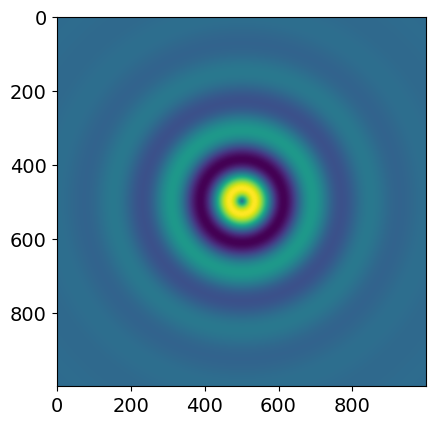

In [ ]:
x = np.linspace(-20, 20, 1000)
y = x[::-1].reshape((-1, 1))
dist = np.sqrt(x ** 2 + y ** 2)
img = np.sin(dist) * np.exp(-dist * 0.2)
plt.imshow(img)
plt.show()
#print(x)

Здесь в переменной `x` мы создали линейную последовательность точек по оси x, в переменной `y` - эту же последовательность, но расположенную вертикально (реверс сделан, чтобы ось y была направлена как обычно снизу вверх - строки в массивах нумеруются сверху вниз). Сложение двух массивов, один из которых представляет собой строку, а другой - столбец, дает матрицу попарных сумм их элементов.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[10],
              [20],
              [30]])
a + b

С помощью этого приема легко одной операцией посчитать функцию двух переменных на некотором участке пространства. В данном случае мы посчитали затухающий синус.

**Упражнение №5**
Изобразите функцию на диапазоне \[-3, 3]
$$
f(x, y) = x^2 + (y + 1 - \sqrt{|x|})^2 - 1
$$

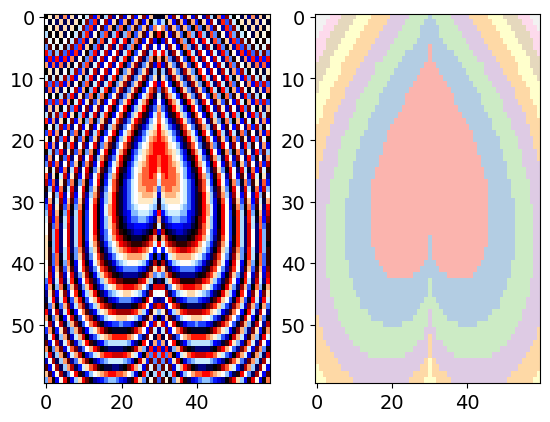

In [ ]:
plt.Figure(figsize=(15,5))
x=np.arange(-3,3,0.1)
y=np.arange(-3,3,0.1).reshape(-1,1)
func=(x**2+(y+1-np.sqrt(np.abs(x)))**2-1)/100
ax1 = plt.subplot(1,2,1)
ax1.imshow(func, aspect='auto', cmap=mpl.colormaps['flag'])
ax2 = plt.subplot(1,2, 2)
ax2.imshow(func, aspect='auto', cmap=mpl.colormaps['Pastel1'])
plt.show()


Напоследок сделаем что-нибудь по-настоящему красивое. Например, множество Мандельброта. Напомним, что это множество точек `c` на комплексной плоскости такое, что последовательность
$$
z_{n} = z_{n-1}^2 + c
$$
задает ограниченную последовательность.

На практике можно вычислить несколько итераций (скажем, 100), и если значение всё ещё меньше 2, можно считать, что в этой точке последовательность ограничена.

Для начала создадим комплексную плоскость.

In [ ]:
re = np.linspace(-2, 2, 200)
im = np.linspace(-2, 2, 200).reshape((-1, 1))
c = re + im * 1j
#print(c)

Теперь посчитаем последотельность. Можете не обращать внимания на предупреждение о переполнении - в некоторых точках последовательность уже ушла в бесконечность.

In [6]:
z = np.zeros((200, 200))
for i in range(100):
    z = z ** 2 + c

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3000746105.py:3: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3000746105.py:3: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


Наконец, изобразим получившееся множество.

In [ ]:
img = np.zeros((200, 200))
img[np.abs(z) < 2] = 255
plt.imshow(np.abs(z), cmap='fla')
plt.show()

**Упражнение №6**
Добавьте в это изображение оттенки в соответствии с тем, насколько быстро последовательность расходится в данной точке. Напишите функцию, в которой можно задать диапазон и количество точек ("качество" изображения).

In [4]:
def mandelbrot(x_low, x_high, y_low, y_high, points_x, points_y, color='flag'):
    plt.figure(figsize=(10,10), dpi=200)
    re=np.linspace(x_low, x_high,points_x)
    im=np.linspace(y_low, y_high,points_y).reshape((-1, 1))
    c=re+im*1j

    z=np.zeros((points_y, points_x))
    img=np.zeros((points_y, points_x))
    for i in range(200):
        z=z**2+c
        img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)

    plt.imshow(img, cmap=color)
    plt.show()
    

C:\Users\olegp\AppData\Local\Temp\ipykernel_23852\3237911173.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_23852\3237911173.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_23852\3237911173.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


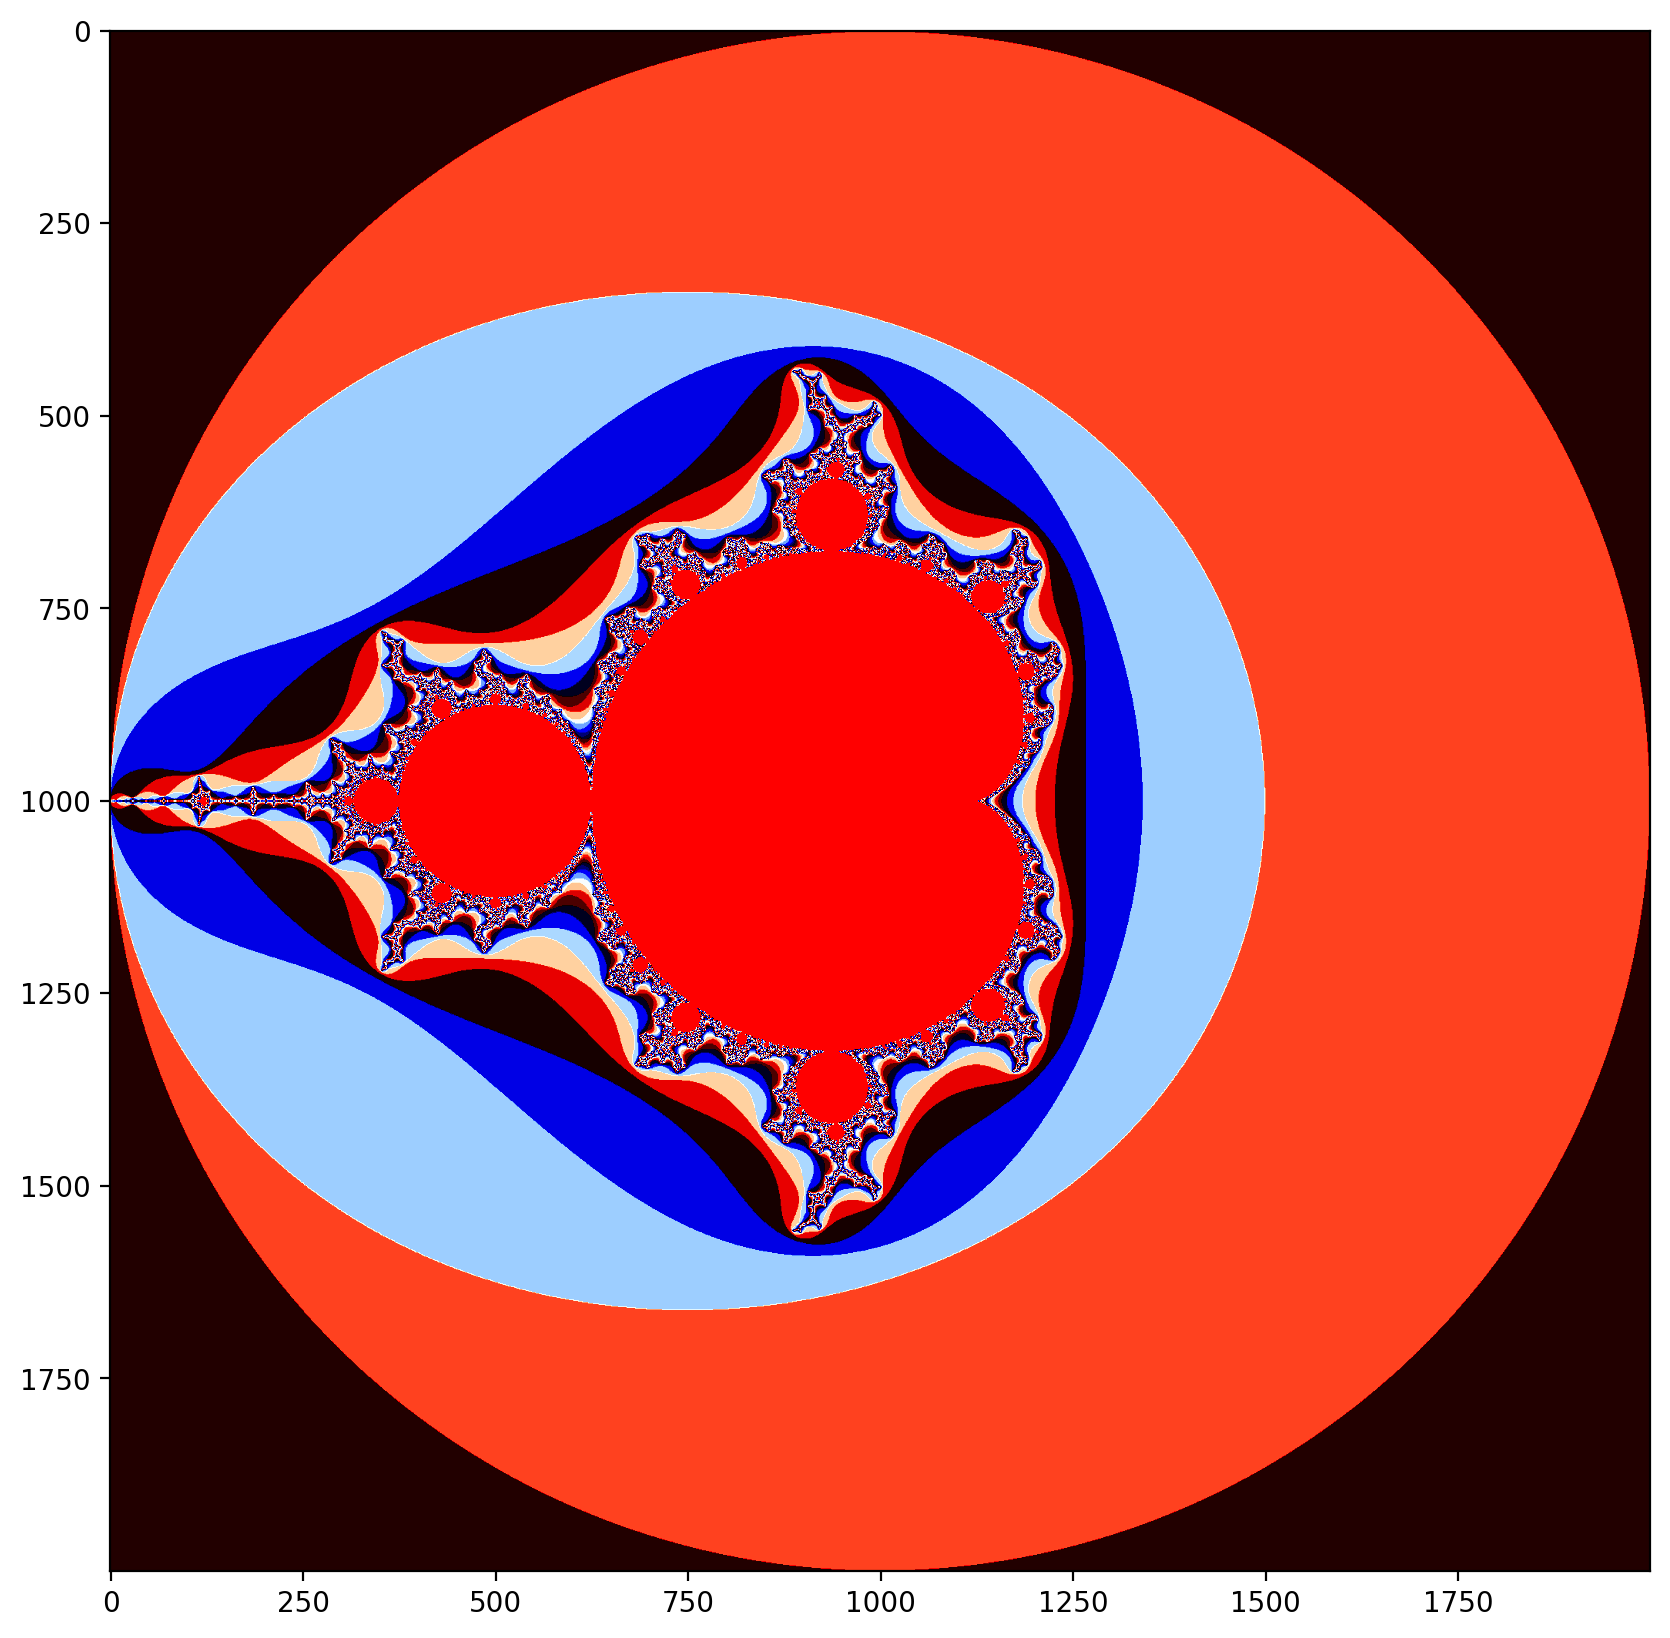

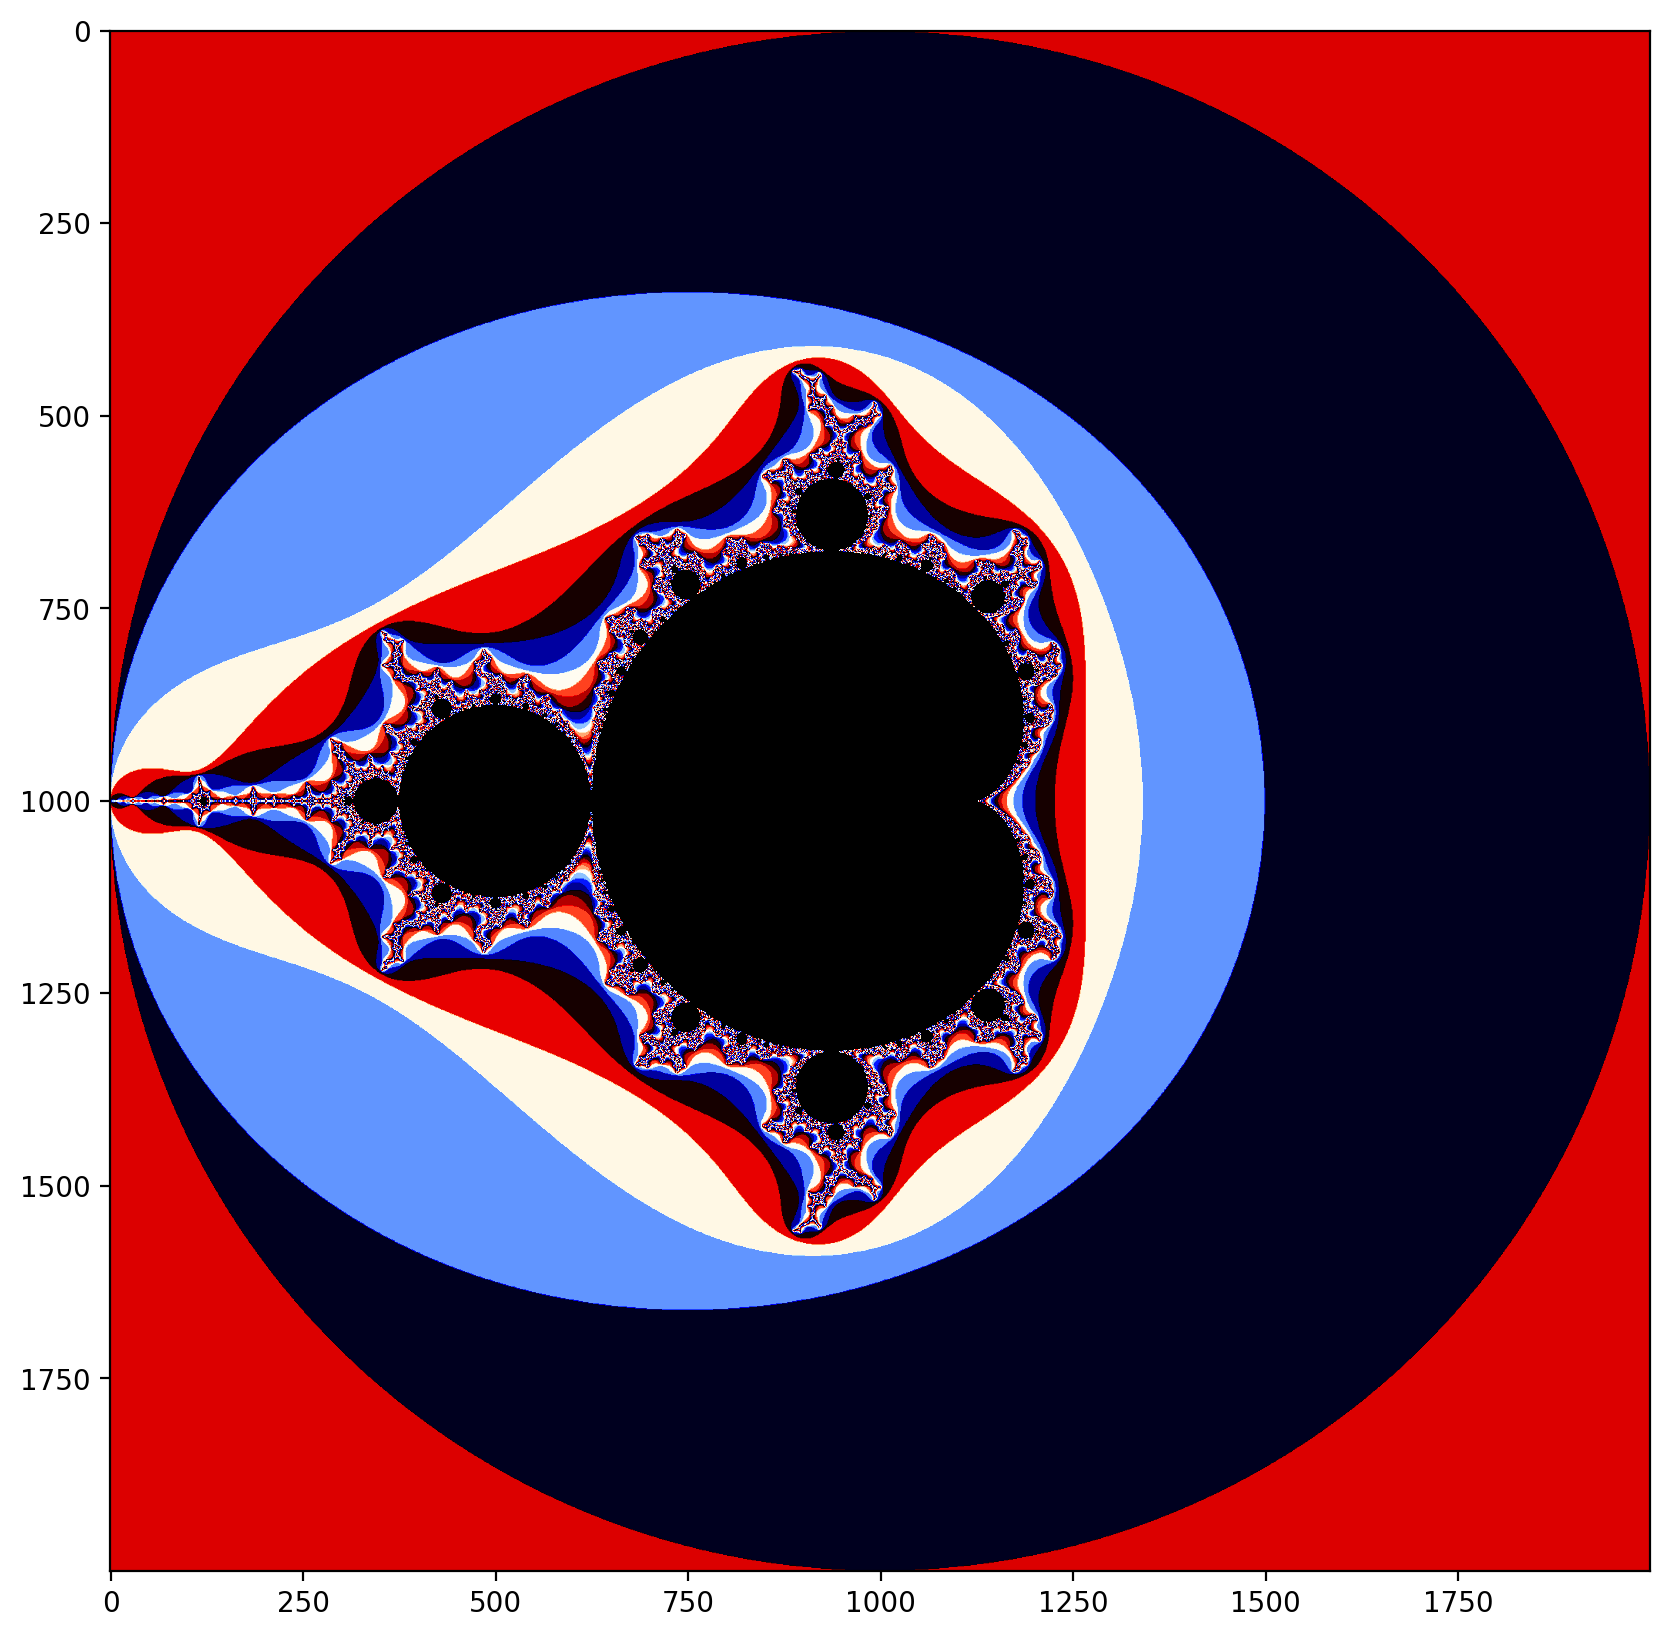

In [5]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'flag')
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'flag_r')


C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


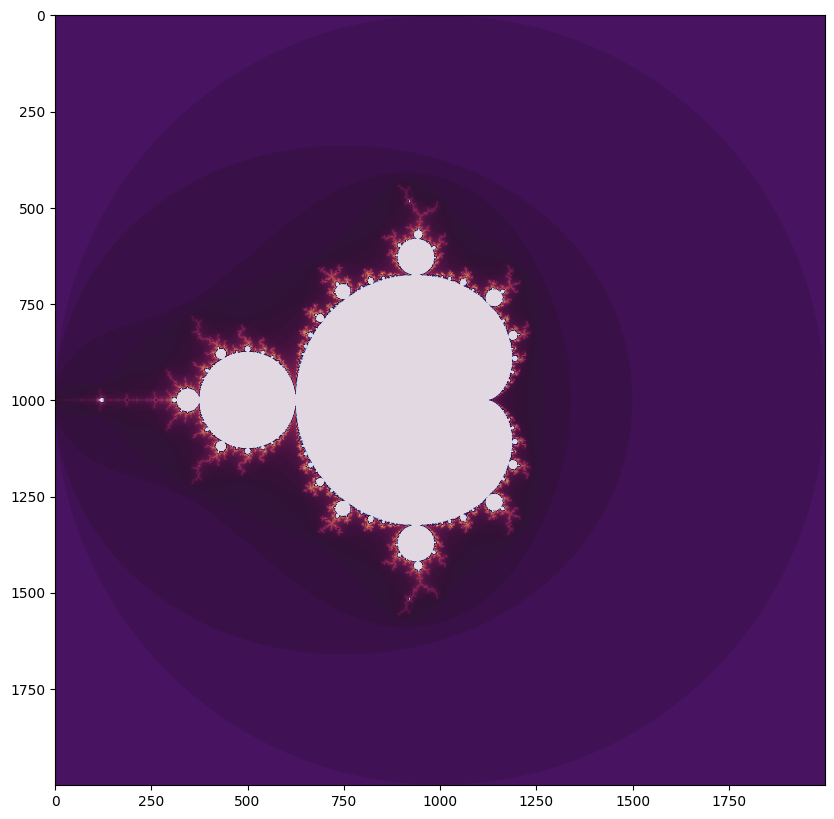

In [16]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'twilight')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


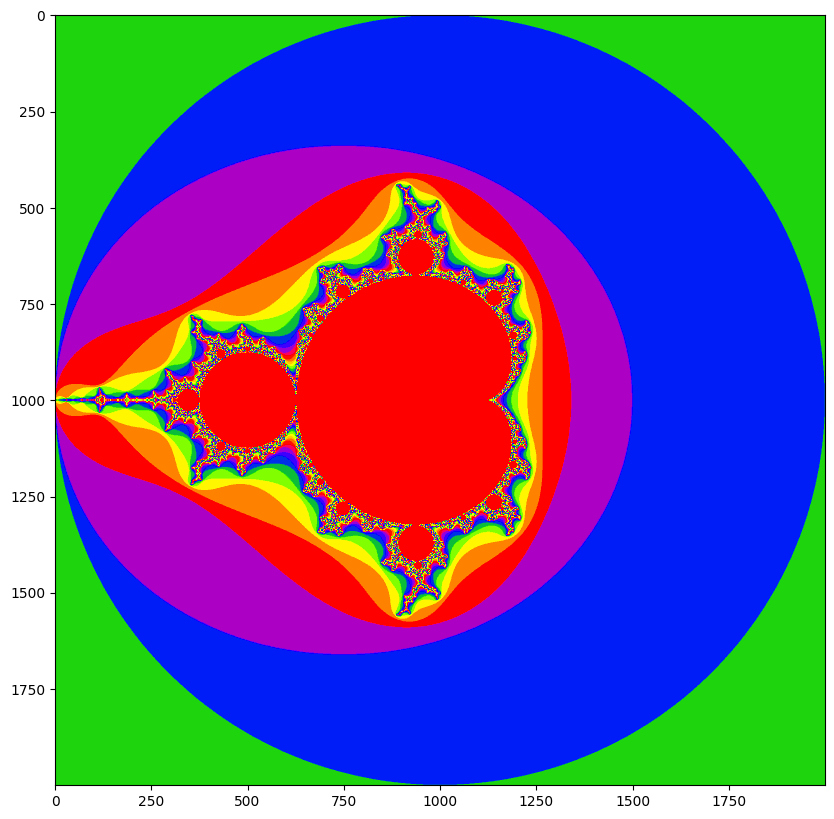

In [26]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'prism')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


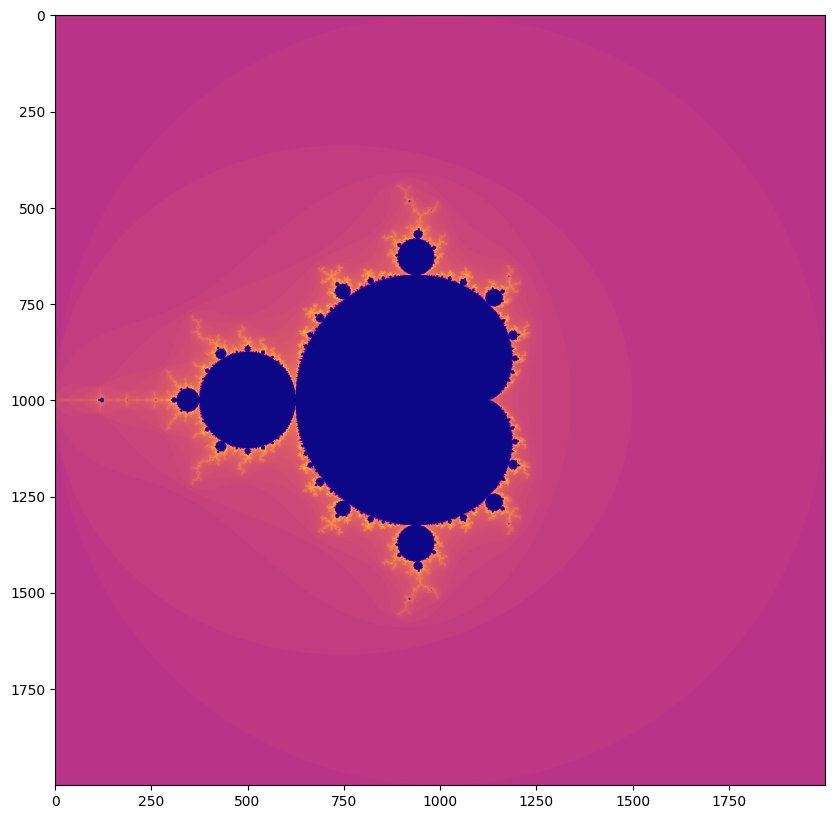

In [15]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'plasma')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


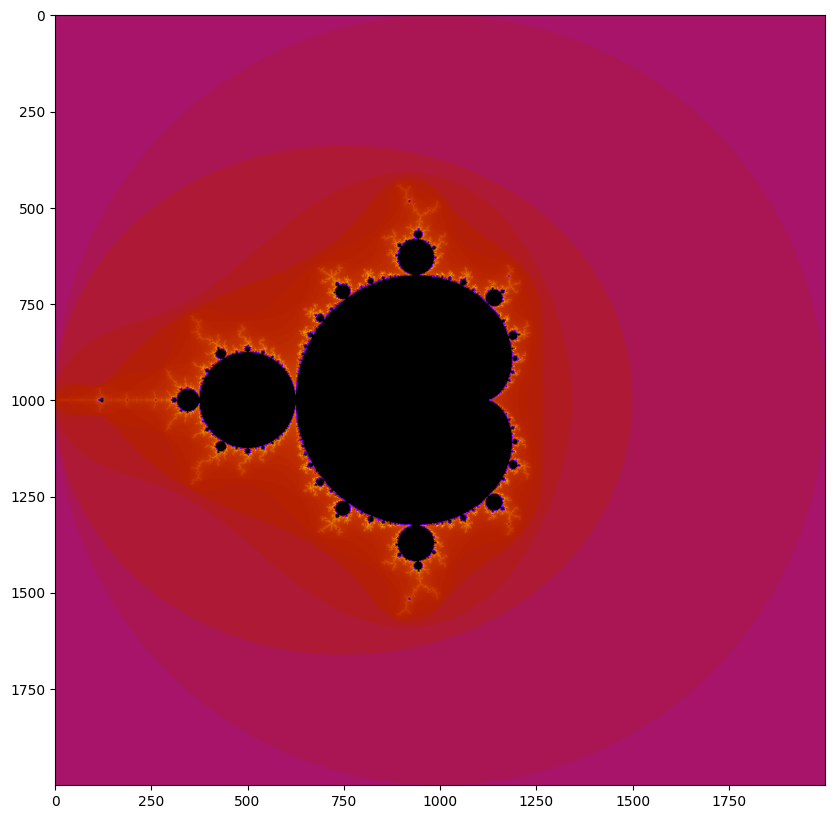

In [27]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'gnuplot')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


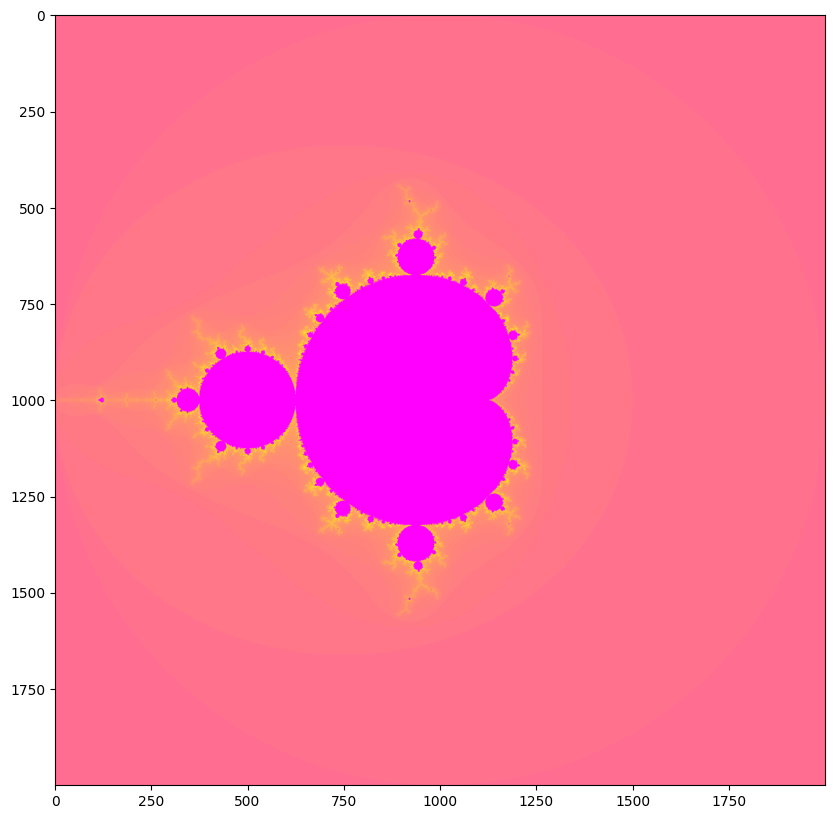

In [28]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'spring')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


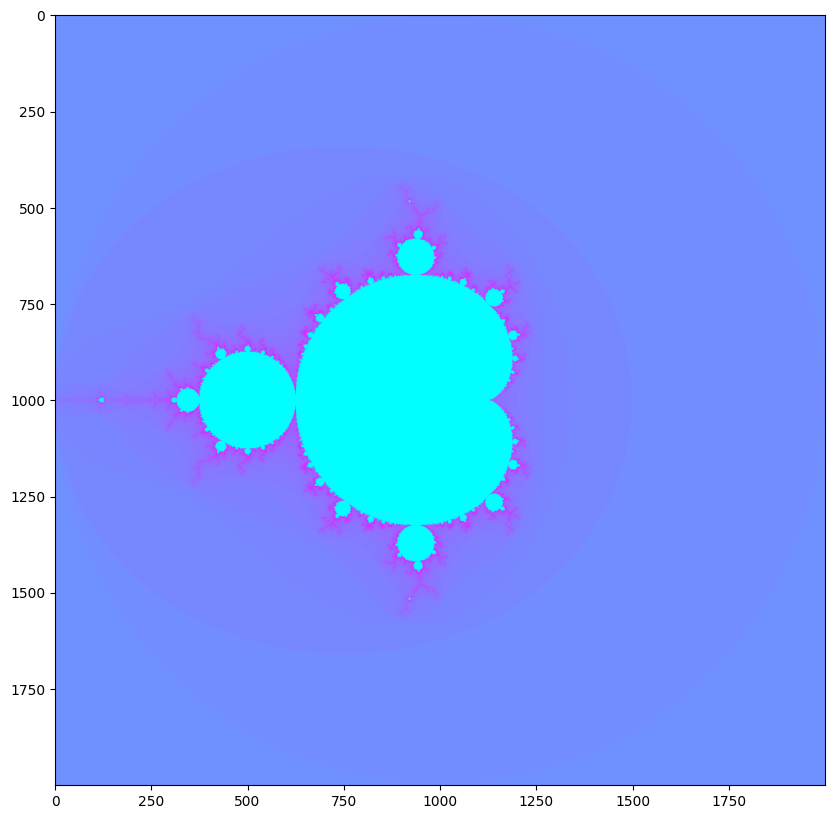

In [29]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'cool')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\3769996736.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


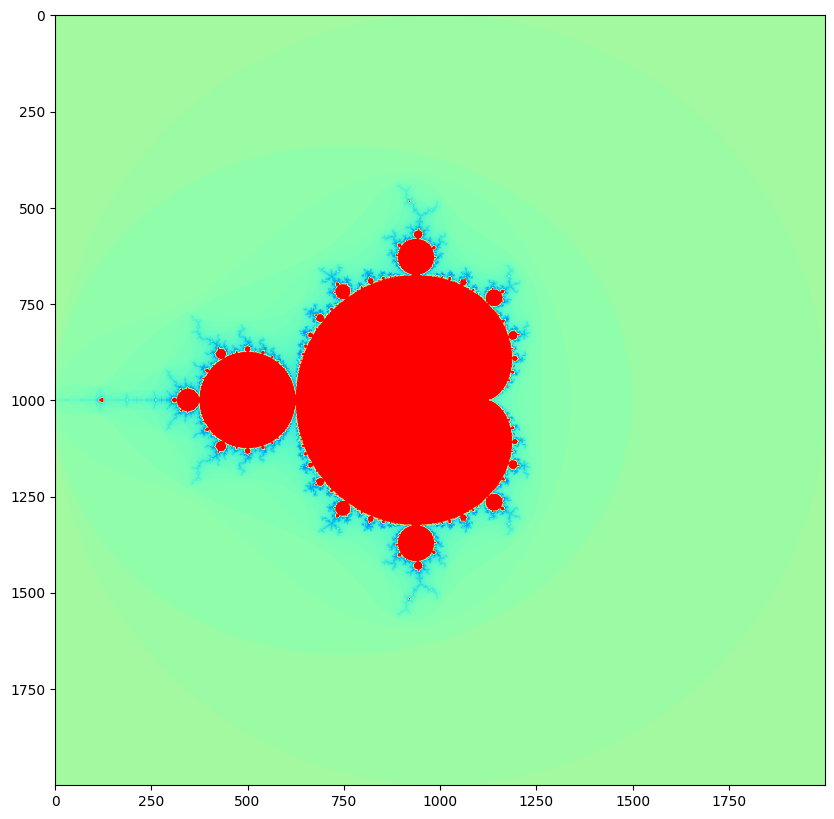

In [31]:
mandelbrot(-2, 2, -2, 2, 2000, 2000, 'rainbow_r')

**Упражнение №7 (дополнительное)**

Изобразите [множество Жюлиа](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%96%D1%8E%D0%BB%D0%B8%D0%B0).

In [18]:
def julia(x_low, x_high, y_low, y_high, points_x, points_y,Zero,color='flag'):
    plt.figure(figsize=(10,10))
    re=np.linspace(x_low, x_high,points_x)
    im=np.linspace(y_low, y_high,points_y)[::-1].reshape((-1, 1))
    z=re+im*1j

    img=np.zeros((points_y, points_x))
    c=np.tile(Zero, (points_y, points_x))
    for i in range(200):
        z=z**2+c
        img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)

    plt.imshow(img, cmap=color)
    plt.show()

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


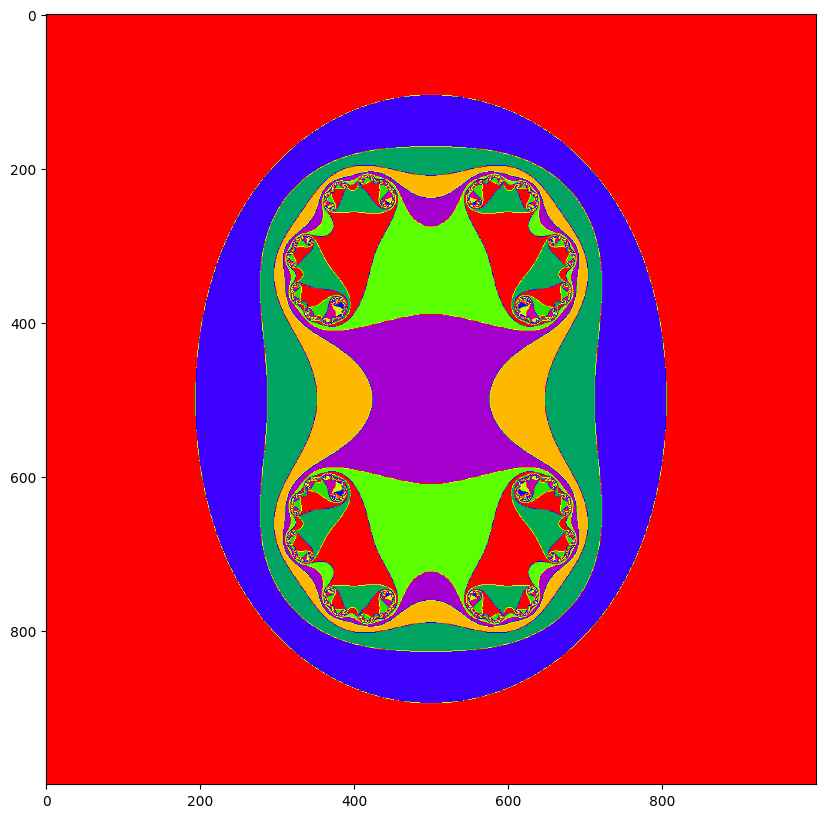

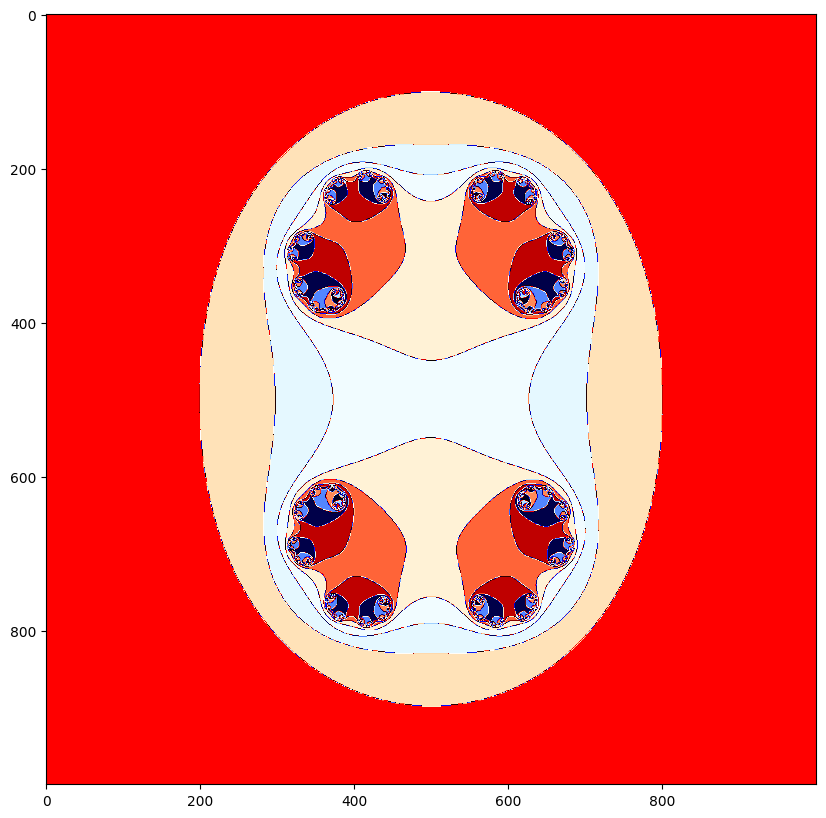

In [25]:
julia(-2, 2, -2, 2, 1000, 1000,0.5,'prism')
julia(-2, 2, -2, 2, 1000, 1000,0.549653+0.003 * 1j,'flag')

C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_27308\168243652.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


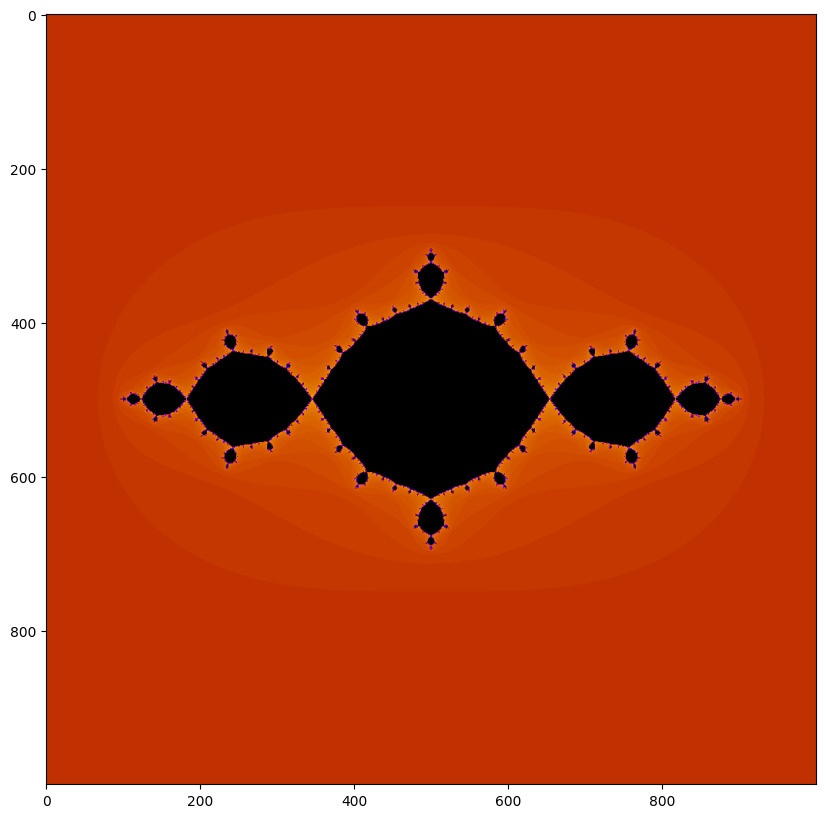

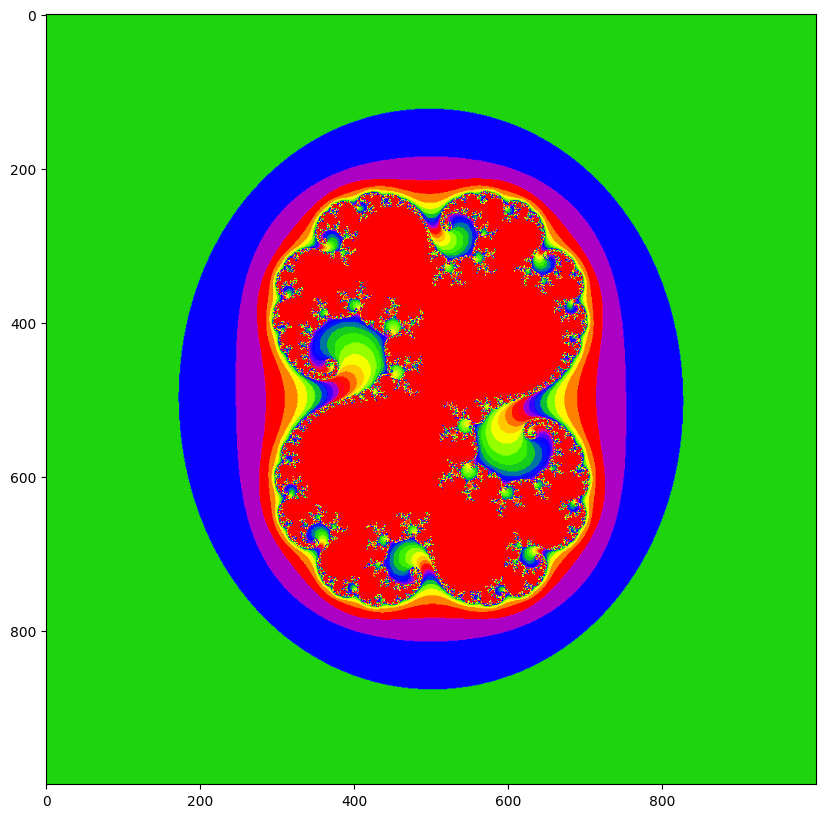

In [20]:
julia(-2, 2, -2, 2, 1000, 1000,-1,'gnuplot')
julia(-2, 2, -2, 2, 1000, 1000,0.28+0.0113*1j,'prism')


C:\Users\olegp\AppData\Local\Temp\ipykernel_17932\168243652.py:10: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_17932\168243652.py:10: RuntimeWarning: invalid value encountered in square
  z=z**2+c
C:\Users\olegp\AppData\Local\Temp\ipykernel_17932\168243652.py:11: RuntimeWarning: overflow encountered in absolute
  img[(img==0) & (np.abs(z)>2)]=np.log10(i+10)


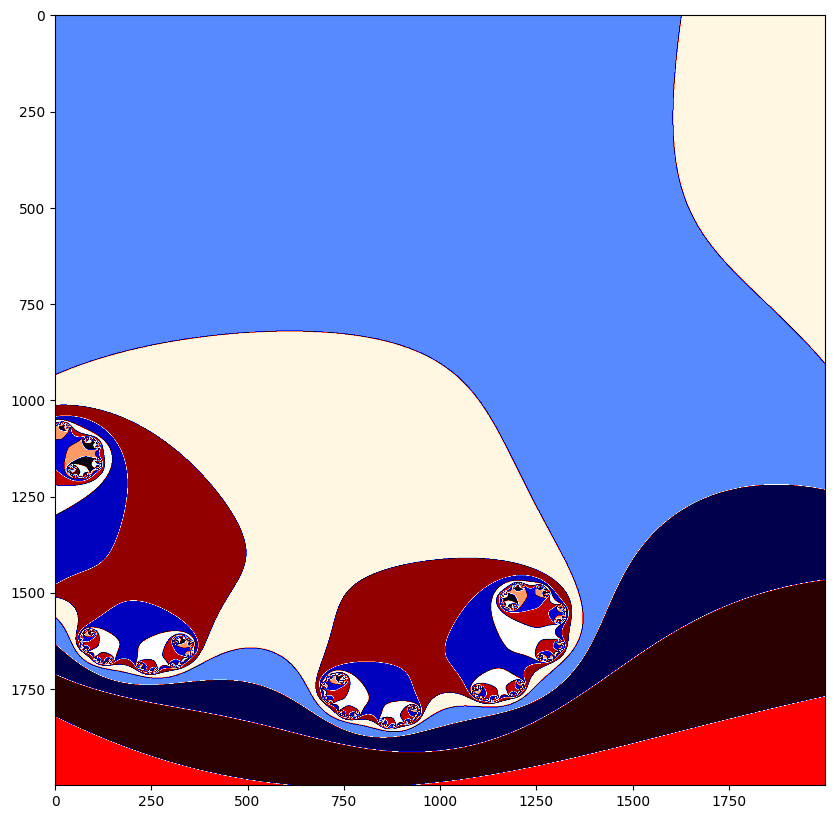

In [20]:

julia(0.466, 0.47, 0.485, 0.49, 2000, 2000,0.549653+0.003 * 1j,'flag')
